In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [86]:
df=pd.read_csv('train.csv')

In [87]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [89]:
x=df[['battery_power','int_memory','ram']]
y=df['price_range']

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn=KNeighborsClassifier()

In [94]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [95]:
prediction=knn.predict(x_test)

In [96]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       154
           1       0.80      0.79      0.79       163
           2       0.69      0.77      0.73       171
           3       0.88      0.79      0.83       172

    accuracy                           0.82       660
   macro avg       0.82      0.82      0.82       660
weighted avg       0.82      0.82      0.82       660



In [98]:
accuracy={}

In [99]:
accuracy['knn(11)']=metrics.accuracy_score(y_test,prediction)

SVM

In [100]:
from sklearn.svm import SVC

In [101]:
gtm=SVC()

In [102]:
gtm.fit(x_train,y_train)

SVC()

In [103]:
prediction=gtm.predict(x_test)

In [104]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       154
           1       0.80      0.86      0.83       163
           2       0.76      0.75      0.76       171
           3       0.89      0.84      0.86       172

    accuracy                           0.84       660
   macro avg       0.85      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
print(confusion_matrix(y_test,prediction))

[[143  11   0   0]
 [ 11 140  12   0]
 [  0  25 129  17]
 [  0   0  28 144]]


In [107]:
accuracy['SVC']=metrics.accuracy_score(y_test,prediction)

DECISION TREE

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
shoes=DecisionTreeClassifier()

In [110]:
shoes.fit(x_train,y_train)

DecisionTreeClassifier()

In [111]:
pred=shoes.predict(x_test)

In [112]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       154
           1       0.69      0.68      0.69       163
           2       0.62      0.71      0.66       171
           3       0.85      0.76      0.80       172

    accuracy                           0.75       660
   macro avg       0.76      0.75      0.75       660
weighted avg       0.75      0.75      0.75       660



In [113]:
accuracy['DECISION TREE']=metrics.accuracy_score(y_test,prediction)

RANDOM FOREST

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
socks=RandomForestClassifier()

In [116]:
socks.fit(x_train,y_train)

RandomForestClassifier()

In [117]:
predictionz=socks.predict(x_test)

In [118]:
print(classification_report(y_test,predictionz))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       154
           1       0.80      0.77      0.79       163
           2       0.69      0.78      0.73       171
           3       0.89      0.79      0.84       172

    accuracy                           0.82       660
   macro avg       0.83      0.82      0.82       660
weighted avg       0.82      0.82      0.82       660



In [119]:
accuracy['RANDOM FOREST']=metrics.accuracy_score(y_test,prediction)

LOGISTIC REGRESSION

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
lr=LogisticRegression()

In [122]:
lr.fit(x_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
predict = lr.predict(x_test)

In [124]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       154
           1       0.41      0.44      0.43       163
           2       0.33      0.13      0.19       171
           3       0.48      0.77      0.59       172

    accuracy                           0.50       660
   macro avg       0.49      0.50      0.48       660
weighted avg       0.48      0.50      0.47       660



In [125]:
accuracy['LOGISTIC REGRESSION']=metrics.accuracy_score(y_test,prediction)

ANN

In [126]:
from tensorflow.keras.utils import to_categorical

In [127]:
y_cat=to_categorical(y)
y_cat

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y_cat,test_size=0.33)

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
scaler = MinMaxScaler()

In [131]:
scaler.fit(x_train)

MinMaxScaler()

In [132]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [134]:
from tensorflow.keras.callbacks import EarlyStopping

In [135]:
early_stop=EarlyStopping(patience=10)

In [136]:
model = Sequential()

In [137]:
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu'))

model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [138]:
x_train

array([[0.86898396, 0.12903226, 0.11758418],
       [0.08756684, 0.75806452, 0.88295029],
       [0.63636364, 0.06451613, 0.27899519],
       ...,
       [0.78074866, 0.72580645, 0.1656868 ],
       [0.38703209, 0.64516129, 0.5879209 ],
       [0.22593583, 0.5       , 0.48530198]])

In [139]:
early_stop

In [140]:
model.fit(x_train, y_train, epochs = 400, validation_data=(x_test, y_test),callbacks=[early_stop])

Epoch 1/400
42/42 [==============================] - 2s 11ms/step - loss: 1.3793 - accuracy: 0.2716 - val_loss: 1.3779 - val_accuracy: 0.2303
Epoch 2/400
42/42 [==============================] - 0s 5ms/step - loss: 1.3701 - accuracy: 0.2672 - val_loss: 1.3707 - val_accuracy: 0.2773
Epoch 3/400
42/42 [==============================] - 0s 5ms/step - loss: 1.3591 - accuracy: 0.2784 - val_loss: 1.3582 - val_accuracy: 0.3727
Epoch 4/400
42/42 [==============================] - 0s 9ms/step - loss: 1.3445 - accuracy: 0.3119 - val_loss: 1.3262 - val_accuracy: 0.3758
Epoch 5/400
42/42 [==============================] - 0s 7ms/step - loss: 1.3091 - accuracy: 0.3388 - val_loss: 1.2786 - val_accuracy: 0.4864
Epoch 6/400
42/42 [==============================] - 0s 10ms/step - loss: 1.2680 - accuracy: 0.3933 - val_loss: 1.2117 - val_accuracy: 0.4773
Epoch 7/400
42/42 [==============================] - 1s 13ms/step - loss: 1.2394 - accuracy: 0.4127 - val_loss: 1.1573 - val_accuracy: 0.5106
Epoch 8/40

In [141]:
loss_df = pd.DataFrame(model.history.history)

In [142]:
predictions = model.predict(x_test)

21/21 [==============================] - 0s 3ms/step


In [143]:
final_predictions=np.argmax(predictions,axis=1)

In [144]:
true_y=np.argmax(y_test,axis=1)

In [145]:
print(classification_report(true_y,final_predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       167
           1       0.80      0.75      0.78       175
           2       0.66      0.84      0.74       164
           3       1.00      0.63      0.77       154

    accuracy                           0.80       660
   macro avg       0.83      0.80      0.80       660
weighted avg       0.82      0.80      0.80       660



In [146]:
accuracy['ANN']=metrics.accuracy_score(true_y,final_predictions)

In [147]:
model.save('model.h5')

In [148]:
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.379264,0.271642,1.377903,0.230303
1,1.370111,0.267164,1.370713,0.277273
2,1.359130,0.278358,1.358236,0.372727
3,1.344459,0.311940,1.326196,0.375758
4,1.309090,0.338806,1.278592,0.486364


<AxesSubplot:>

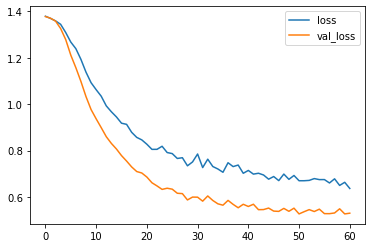

In [149]:
loss_df[['loss','val_loss']].plot()

<AxesSubplot:>

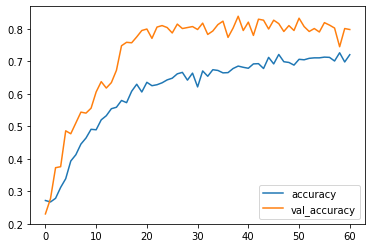

In [150]:
loss_df[['accuracy','val_accuracy']].plot()

<BarContainer object of 6 artists>

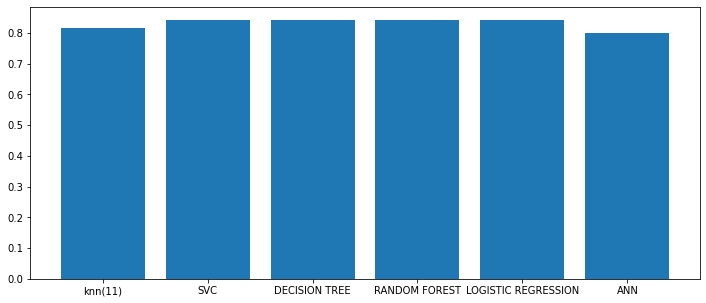

In [151]:
plt.figure(figsize=(12,5))
plt.bar(x=accuracy.keys(),height=accuracy.values())

In [152]:
finalSVC=SVC()

In [153]:
finalSVC.fit(x,y)

SVC()

In [154]:
import pickle

pickle.dump(finalSVC,open('model.pkl','wb'))

In [155]:
loaded_model=pickle.load(open('model.pkl','rb'))

In [159]:
loaded_model.predict([[1000,50,2500]])

array([2], dtype=int64)

In [161]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [164]:
loaded_model.predict_proba([[1000,50,2500]])

AttributeError: predict_proba is not available when  probability=False